# Питонски драйвер за захранване, с един канал модел AX800P

In [1]:
from tools import print_my_ip, search_by_manufacturer, serial_ports_list
import ax6003py

In [2]:

baudrate = 9600
ports = serial_ports_list()
mnfact = ax6003py.mnfact_linux   #??? какво ще се появи в windows???
serial_port_dev = search_by_manufacturer(ports, mnfact)


print(mnfact)
print(serial_port_dev)

ps = ax6003py.Ax6003Py(port=serial_port_dev, baudrate=baudrate)



0.   None   /dev/ttyS0
1.   Prolific Technology Inc.   /dev/ttyUSB0

Prolific Technology Inc
/dev/ttyUSB0


### Оерации, който може би трябва да бъдат исвършение след стартиране 

In [102]:
ps.status() #Пи започване на работа на системата и трябва една команда, 
            #за да я обърне да работи в сериен режим ... прави нищо
    
ps.reset()        #Винаги започваме от едно и също състояние, 
ps.delay_time(1)  #Време за отговор на въведените сетинги - 1с (по подразбиране 10)

1

### Команди за сетване на ток и напрежение:

In [9]:
ps.apply_voltage(10) # сетва напрежение на 2V

10.0

In [5]:
ps.apply_current(0.1) # сетва ток на 0.1A

0.1

In [6]:
ps.apply(2.5, 0.15) # сетва едновременно тока и напрежението  

[2.5, 0.15]

Същите команди могат да се използват и без параметри. Тогава връщат моментното състояние на СЕТИНГИТЕ за ток и напрежение

In [7]:
print(ps.apply_voltage())

2.5


In [8]:
print(ps.apply_current())

0.15


In [9]:
print(ps.apply())

[2.5, 0.15]


### Включване и изклюване на изхода  на системата

In [6]:
#за да извадим някакво напрежение на изхода, трябва да го включим
ps.output(1)

1

In [16]:
# ..или да го изкючим 
ps.output(0)

0

In [12]:
# и тази команда без параметър дава в какво състояние е изхода

print(ps.output())

0


### Измерване на ток, напрежение, мощност ...(разбира се ако изхода е включен)

In [12]:
print(f'U = {ps.measure_voltage()}V')
print(f'I = {ps.measure_current()}A')
print(f'W = {ps.measure_power()}W')

U = 9.999995V
I = 0.000708A
W = 0.007083W


### Използване на предпазители - не е тествано ...
Има два предпазителя, единият по ток, другия по напрежение, след като нивото на задействане се определи и предпазителя, се активира, може би може да прекъсне, ако зададеното ниво се надмине.


In [14]:
ps.current_protection_level(0.5)
ps.current_protection_state('ON')
ps.current_protection_triped()

0

 Ако current_protection_triped() даде 1, захранването би трябвало да спре и работата му да се възтанови с:

In [15]:
ps.current_protection_clear()

0

Абсолщтно същото и за волтажа

In [16]:
ps.voltage_protection_level(12)
ps.voltage_protection_state('ON')
ps.voltage_protection_triped()

0

In [17]:
ps.voltage_protection_clear()

0

In [110]:
import time

U = []
mI = []
ps.reset()
ps.delay_time(1)

ps.apply_current(0.5)
ps.apply_voltage(0)

ps.output(1)

du = 1.0 #V
tmp_u = 0.0

while True:
    tmp_u = ps.apply_voltage(tmp_u + du)
    while not ps.ready():
        time.sleep(1)
        
    if tmp_u > 40: 
        ps.output(0)
        break
        
    time.sleep(5)
    U.append(ps.measure_voltage())
    mI.append(ps.measure_current()*1000.0)
        
    
    
    

In [112]:
print(i)

[0.    0.181 0.402 0.618 0.832 1.046 1.266 1.481 1.706 1.926 2.148 2.379
 2.602 2.835 3.057 3.285 3.517 3.741 3.968 4.191 4.419 4.642 4.865 5.084
 5.297 5.513 5.736 5.959 6.176 6.39  6.614 6.829 7.045 7.261 7.476 7.688
 7.9   8.102 8.31  8.523]


In [123]:
import numpy as np





u  = np.array(U, dtype=np.float64)
i =  np.array(mI, dtype=np.float64)


r = np.average(u)/np.average(i)*1000
print(r)

coef = np.polyfit(u,i/1000,1)

print(coef)

4793.327963277001
[ 0.0002211  -0.00025573]


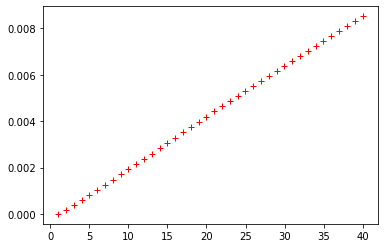

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
#ax.axhline(y=0, color="black", linestyle="--")
#ax.axhline(y=0.5, color="black", linestyle=":")
#ax.axhline(y=1.0, color="black", linestyle="--")
#ax.axvline(color="grey")
#ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.plot(u, i/1000, 'r+')

#ax.set(xlim=(-10, 10), xlabel="t")
#ax.legend(fontsize=14)
plt.show()